<h3> Esame 24 january 2024 </h3>

<p> Punto 1) Calcolare con il metodo hit or miss il valore che deve assumere A affinche la pdf f(x) sia correttamente normalizzata</p>

<p> Punto 2)  Si generi un insieme di 10 000  numeri casuali x_i distribuiti secondo la pdf f(x) utilizzando il metodo try and catch </p>

<p> Punto 3) Si mostri in un istogramma la distribuzione degli eventi generati </p>

<p> Punto 4) Si calcolino,apartire dagli eventi generati,la media,deviazione standard,asimmetria e curtosi della distribuzione implementando le funzioni corrispondenti. </p>

1.2
<class 'list'>


TypeError: unsupported operand type(s) for -: 'list' and 'float'

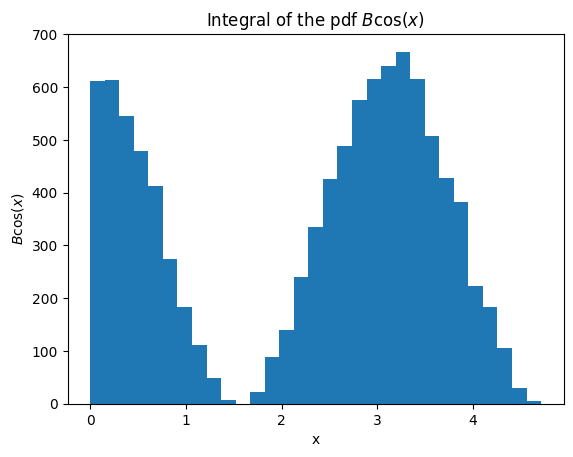

In [35]:
from math import cos,pi,ceil
from integration import integral_HOM
from myrand import generate_TAC
import numpy as np
import stats as stats
import matplotlib.pyplot as plt


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def main():
    
    # Point 1) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    xmin = 0. 
    xmax = 1.5*pi
    

    f = lambda x : cos(x)**2

    B = integral_HOM(f,xmin,xmax,1.,50)[0]

    A = 1/B

    # We estimate the value of the integral of cos^2(x) without the costant A and after this we recalculate the integral of the function B*cos^2(x), in this way the pdf is normalized
    
    pdf = lambda x : A*cos(x)**2

    integral = integral_HOM(pdf,xmin,xmax,A,50)[0] 

    print(integral)

# Point 2)  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    NToys = 10000

    ymax = A

    sample =  generate_TAC(pdf,xmin,xmax,ymax, NToys)[0]


# Point 3)  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    nbins = sturges(sample)

    bins_edges = np.linspace(xmin,xmax,nbins)

    plt.hist(sample,bins = bins_edges)
    plt.title('Integral of the pdf ' + r'$B\cos(x)$')
    plt.xlabel('x')
    plt.ylabel(r'$B\cos(x)$')

# Point 4)  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    measure = stats.stats(sample)

    sampleMean = measure.mean()
    SampleSigma = measure.sigma() # it's the standard deviation of the sample
    SampleSkew = measure.skew() # it's the assimetry of  the sample 
    SampleKurt = measure.kurt()






if __name__ == "__main__": main()